In [13]:
%matplotlib inline
from matplotlib import pyplot as plt, rcParams
import pandas as pd
from scipy import special, optimize
import numpy as np

In [ ]:
# a = np.arange(0, 40, 10)
# print(a.shape)
# print(a)
# k = np.ones((a.shape[0], ))

# b= np.stack((a, k), axis=-1)
# print(b.shape)
# print(b)

# c = np.append(a, k)
# print(c.shape)
# print(c)

# x = a[:, np.newaxis]
# y = np.ones((a.shape[0], 1))
# d = np.concatenate((y, x), axis=1)
# print(d.shape)
# print(d)


# # ベクトルと　行列の扱いが違うのがメンドイ。
# outa = np.ones((X.shape[0], ))
# print(outa[:4])

# print('X[:, 0]:shape', X[:, 0].shape)
# out = np.ones((X.shape[0], 1))

# print(out[:4])
# # print('out:shape', out.shape)
# # np.hsplit(X, 2)




# Machine Learning Online Class - Exercise 2: Logistic Regression

Instructions


This file contains code that helps you get started on the second part of the exercise which covers regularization with logistic regression.

You will need to complete the following functions in this exericse:

- sigmoid.m
- costFunction.m
- predict.m
- costFunctionReg.m

For this exercise, you will not need to change any code in this file, or any other files other than those mentioned above.


# Load Data
The first two columns contains the X values and the third column contains the label (y).

In [14]:
df = pd.read_csv("./ex2data2.txt", names=['score1', 'score2', 'admitted'])
df.head()

,score1,score2,admitted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [15]:
X = df.as_matrix(["score1","score2"])
y = df.as_matrix(["admitted"])

In [16]:
print('X:shape', X.shape)
print('y:shape', y.shape)


X:shape (118, 2)
y:shape (118, 1)


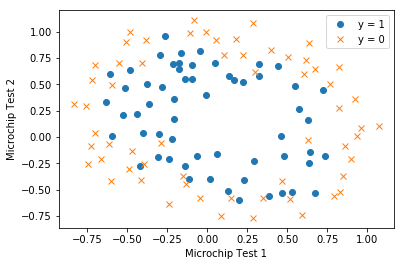

In [17]:
def plot_data(X, y):
    pos = X[(y==1)[:, 0]]
    neg = X[(y==0)[:,0]]

    plt.plot(pos[:, 0], pos[:, 1], "o", label=u'y = 1')
    plt.plot(neg[:, 0], neg[:, 1], "x", label=u'y = 0')
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend()

# call this function
plot_data(X, y)

# Part 1: Regularized Logistic Regression

In this part, you are given a dataset with data points that are not linearly separable. 
However, you would still like to use logistic regression to classify the data points.

To do so, you introduce more features to use -- in particular, you add polynomial features to our data matrix (similar to polynomial regression).


In [18]:
def map_feature(X1, X2):
    
    degree = 6
    out = np.ones((X1.shape[0], 1))

    for i in range(1, degree):
        for j in  range(0, i):
            n = np.power(X1, i - j) * np.power(X2, j)
            out = np.hstack((out, n))
    return out

In [19]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [20]:
def cost_function_reg(theta, X, y, lmd):
    '''
    function [J, grad] = costFunctionReg(theta, X, y, lambda)
    COSTFUNCTIONREG Compute cost and gradient for logistic regression with regularization
    J = COSTFUNCTIONREG(theta, X, y, lambda) 
    computes the cost of using theta as the parameter for regularized logistic regression and the gradient of the cost w.r.t. to the parameters.
    '''
    
    # Initialize some useful values
    m = y.shape[0]
    
    # You need to return the following variables correctly
    J = 0
    grad = np.zeros(theta.shape)
    
    '''
    ====================== YOUR CODE HERE ======================
    Instructions: Compute the cost of a particular choice of theta.
                           You should set J to the cost.
                           Compute the partial derivatives and set grad to the partial derivatives of the cost w.r.t. each parameter in theta
    '''
    
    if len(theta.shape) == 1:
        theta = theta[:, np.newaxis]
    
    hx = sigmoid(np.dot(X, theta))
       
    theta[0, :] = 0
    regular = lmd / (2*m) * np.dot(theta.T, theta)
    
#     '''
    print('init_theta: ', theta.shape)
    print('X: ', X.shape)
    print("hx shape", hx.shape)
    print("y shape", y.shape)
    print("regular shape", regular.shape)
    print("theta shape", theta.shape)
#     '''
    
    J = (1/m) * ( - np.dot(y.T, np.log(hx)) - np.dot((1 - y).T, np.log(1 - hx))) + regular

    
    y_m = y# [:, np.newaxis] # y.shape => (m, ) h.shape =>(m,1)
    grad = (1/m) * np.dot(X.T, (hx -  y_m))
    
    print("J shape", J.shape)
    print("grad shape", grad.shape)
    return (J, grad)


# Add Polynomial Features
# Note that mapFeature also adds a column of ones for us, so the intercept term is handled

X_s = np.hsplit(X, 2)
X = map_feature(X_s[0], X_s[1])

# Initialize fitting parameters
(m, n) = X.shape
initial_theta = np.zeros((n, 1))

# Set regularization parameter lambda to 1
lmd = 1

# Compute and display initial cost and gradient for regularized logistic regression
res = cost_function_reg(initial_theta, X, y, lmd)
cost = res[0]
grad = res[1]

print("Cost at initial theta (zeros): {0}".format(cost))
print("Expected cost (approx): 0.693")
print('Gradient at initial theta (zeros) - first five values only:')
print(grad[:5])
print("Expected gradients (approx) - first five values only:")
print("0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115")

init_theta:  (16, 1)
X:  (118, 16)
hx shape (118, 1)
y shape (118, 1)
regular shape (1, 1)
theta shape (16, 1)
J shape (1, 1)
grad shape (16, 1)
Cost at initial theta (zeros): [[ 0.69314718]]
Expected cost (approx): 0.693
Gradient at initial theta (zeros) - first five values only:
[[ 0.00847458]
 [ 0.01878809]
 [ 0.05034464]
 [ 0.01150133]
 [ 0.01835599]]
Expected gradients (approx) - first five values only:
0.0085
 0.0188
 0.0001
 0.0503
 0.0115


# Part 2: Regularization and Accuracies

Optional Exercise:
In this part, you will get to try different values of lambda and see how regularization affects the decision coundart

Try the following values of lambda (0, 1, 10, 100).

How does the decision boundary change when you vary lambda? 
How does the training set accuracy vary?

In [21]:
def plot_decision_boundary(theta, X, y):
    plt.plot(pos[:, 0], pos[:, 1], "o", label=u'y = 1')
    plt.plot(neg[:, 0], neg[:, 1], "x", label=u'y = 0')
    
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')

#     plt.plot(, , "-g", label=u'Decision boundary')
#     plt.legend()


In [22]:
def predict(theta_cv, X):
    m = X.shape[0] # Number of training examples
    # You need to return the following variables correctly
    p = np.zeros((m, 1))
    return sigmoid(np.dot(X, theta_cv)) >= 0.5

In [25]:
# Initialize fitting parameters
(m, n) = X.shape

initial_theta = np.zeros((n, 1))
print('initial_theta: ', initial_theta.shape)
# Set regularization parameter lambda to 1 (you should vary this)
lmd = 1

# Optimize
f = lambda t: cost_function_reg(t, X, y, lmd)
res = optimize.minimize(f, initial_theta, method='BFGS', jac=True, options={'maxiter': 400})

theta = res.x

# Plot Boundary
plot_decision_boundary(theta, X, y)

# Compute accuracy on our training set
theta_cv = np.array(theta, ndmin=2).T 
p = predict(theta_cv, X) 

print('Train Accuracy: {0}'.format(np.mean(p == y) * 100))

initial_theta:  (16, 1)
init_theta:  (16, 1)
X:  (118, 16)
hx shape (118, 1)
y shape (118, 1)
regular shape (1, 1)
theta shape (16, 1)
J shape (1, 1)
grad shape (16, 1)
init_theta:  (16, 1)
X:  (118, 16)
hx shape (118, 1)
y shape (118, 1)
regular shape (1, 1)
theta shape (16, 1)
J shape (1, 1)
grad shape (16, 1)


ValueError: shapes (16,1) and (16,1) not aligned: 1 (dim 1) != 16 (dim 0)

In [ ]:
# %whos
# optimize.minimize
tht= (1, 2)
len(tht)